### TP3 Monotonie et limiteurs ###

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Condition initiale : créneau
#CL2
def cond_init_cl2(x,x0):
    m=len(x)
    u0_2=np.zeros(m)
    for i in range(m):
        if x[i]<x0:
            u0_2[i]=0
        else:
            u0_2[i]=1
    return u0_2

### 1 Schéma de BW ###

**Schéma de BW :**
$u_{i}^{n+1}=u_{i}^{n}-C(u_{i}^{n}-u_{i-1}^{n})-\frac{C}{2}(1-C)\psi(r_i)(u_{i}^{n}-u_{i-1}^{n})+\frac{C}{2}(1-C)\psi(r_{i-1})(u_{i-1}^{n}-u_{i-2}^{n}) \\
avec : r_i = \frac{u_{i+1}-u_{i}}{u_{i}-u_{i-1}} et r_{i-1}=\frac{u_{i}-u_{i-1}}{u_{i-1}-u_{i-2}}$

In [40]:
eps=10e-13
def Beam_Warming(ui, psi, C=0.5):
    ri = (np.roll(ui, -1) - ui)/(ui - np.roll(ui, +1) + eps*((ui - np.roll(ui, +1)) == 0))
    ri_n_moins_un = (ui - np.roll(ui, +1))/(np.roll(ui, +1) - np.roll(ui, +2) + eps *((np.roll(ui, +1) - np.roll(ui, +2)) == 0))
    ui_n_plus_un = ui - C*(ui - np.roll(ui, +1)) - 0.5*C*(1-C)*psi(ri)*(ui - np.roll(ui, +1)) + 0.5*C*(1-C)*psi(ri_n_moins_un)*(np.roll(ui, +1) - np.roll(ui, +2))
    return ui_n_plus_un

1. Tracer la solution sans limiteur :

In [41]:
def identite(r):
    return r

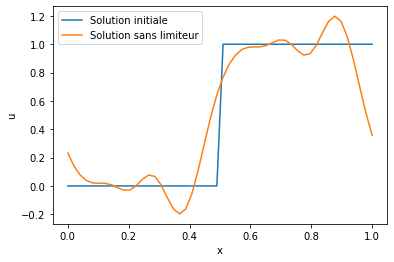

In [42]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)


ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Beam_Warming(ut,identite)

# pour t = t_max
ut = Beam_Warming(ut,identite)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution sans limiteur"])
plt.show()

- Avec le limiteur Min-mod :
$\psi(r) =  \left\{
    \begin{array}{ll}
        min(r,1) si r \geq 0 \\
        0 sinon.
    \end{array}
\right.$

In [43]:
def min_mod(r):
    return np.maximum(np.minimum(r, 1), 0)

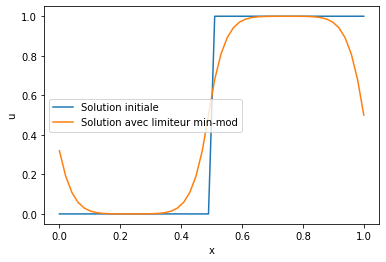

In [44]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)


ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Beam_Warming(ut,min_mod)

# pour t = t_max
ut = Beam_Warming(ut,min_mod)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur min-mod"])
plt.show()


- Avec le limiteur Superbee :
$\psi(r) = max(0,min(2r,1),min(r,2))$

In [45]:
def superbee(r):
    return np.maximum(0, np.minimum(2*r, 1), np.minimum(r, 2))

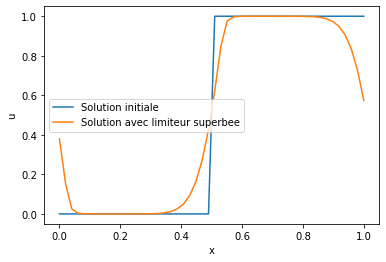

In [46]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Beam_Warming(ut,superbee)

# pour t = t_max
ut = Beam_Warming(ut,superbee)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur superbee"])
plt.show()

- Avec le limiteur Van-Leer :
$\psi(r) = \frac{r+|r|}{1+r}$

In [47]:
def van_leer(r):
    return (r+np.abs(r))/(1+r + eps*(r==-1))

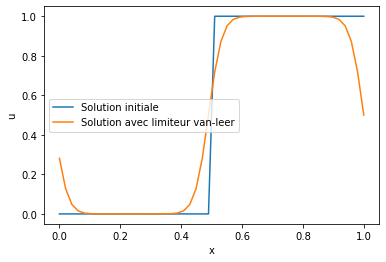

In [48]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Beam_Warming(ut,van_leer)

# pour t = t_max
ut = Beam_Warming(ut,van_leer)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur van-leer"])
plt.show()


- Avec le limiteur Van-Albada :
$\psi(r) = \frac{r^2+r}{r^2+1}$

In [49]:
def van_albada(r):
    return (r**2+r)/(r**2+1)

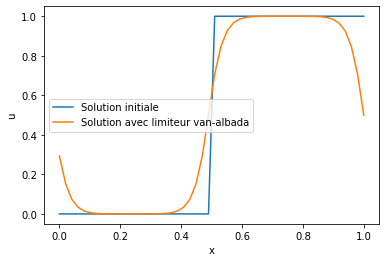

In [50]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)


delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Beam_Warming(ut,van_albada)

# pour t = t_max
ut = Beam_Warming(ut,van_albada)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur van-albada"])
plt.show()


2. Tracer l'évolution temporelle de la variation totale TV, définie comme :
$TV(u^n) = \sum_{i=1}^{m}|u_{i+1}^{n}-u_{i}^{n}|$

In [51]:
def TV(ui):
    return np.sum(np.abs(np.roll(ui, -1) - ui))

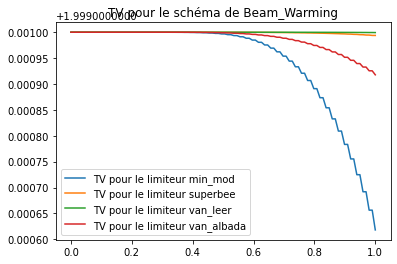

In [52]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)


delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t) #1 sec max
T = np.linspace(0, 1/P, tMax+2)

list_limiteurs = [min_mod, superbee, van_leer, van_albada]

for limiteur in list_limiteurs:
    TV_list = []
    # pour t = t_0
    ut = u0
    TV_list.append(TV(ut))

    # pour t = t_i
    for t in range(tMax):
        ut = Beam_Warming(ut, limiteur, C)
        TV_list.append(TV(ut))


    # pour t = t_max
    ut = Beam_Warming(ut, limiteur, C)
    TV_list.append(TV(ut))
    plt.plot(T, np.array(TV_list))

plt.legend(["TV pour le limiteur {}".format(limiteur.__name__) for limiteur in list_limiteurs])
plt.title("TV pour le schéma de Beam_Warming")
plt.show()


### 2 Schéma de LW ###

**Schéma de LW :**
$u_{i}^{n+1}=u_{i}^{n}-C(u_{i}^{n}-u_{i-1}^{n})-\frac{C}{2}(1-C)\psi(R_i)(u_{i+1}^{n}-u_{i}^{n})+\frac{C}{2}(1-C)\psi(R_{i-1})(u_{i}^{n}-u_{i-1}^{n}) \\
avec : R_i = \frac{u_{i}-u_{i-1}}{u_{i+1}-u_{i}} et R_{i-1}=\frac{u_{i-1}-u_{i-2}}{u_{i}-u_{i-1}}=\frac{1}{r_{i-1}}$

In [53]:
def Lax_Wendroff(ui, psi, C=0.5):
    Ri = (ui - np.roll(ui, +1)) /(np.roll(ui, -1) - ui + eps*((np.roll(ui, -1) - ui) == 0))
    Ri_n_moins_un = (np.roll(ui, +1) - np.roll(ui, +2)) / (ui - np.roll(ui, +1) + eps*((ui - np.roll(ui, +1)) == 0))
    ui_n_plus_un = ui - C*(ui - np.roll(ui, +1)) - 0.5*C*(1-C)*psi(Ri)*(np.roll(ui, -1) - ui) + 0.5*C*(1-C)*psi(Ri_n_moins_un)*(ui - np.roll(ui, +1))
    return ui_n_plus_un

1. Tracer la solution sans limiteur :

In [54]:
def identite(r):
    return r

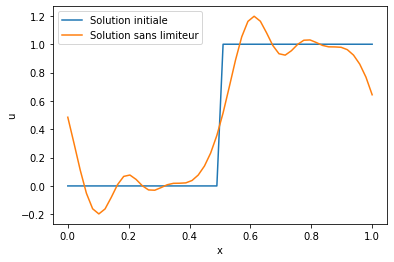

In [55]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Lax_Wendroff(ut,identite)

# pour t = t_max
ut = Lax_Wendroff(ut,identite)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution sans limiteur"])
plt.show()


- Avec le limiteur Min-mod :
$\psi(r) =  \left\{
    \begin{array}{ll}
        min(r,1) si r \geq 0 \\
        0 sinon.
    \end{array}
\right.$

In [56]:
def min_mod(r):
    return np.maximum(np.minimum(r, 1), 0)

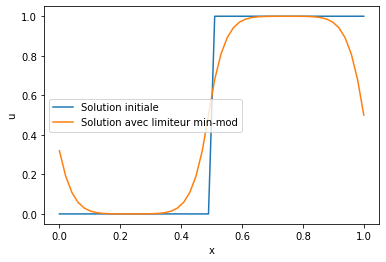

In [57]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Lax_Wendroff(ut,min_mod)

# pour t = t_max
ut = Lax_Wendroff(ut,min_mod)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur min-mod"])
plt.show()


- Avec le limiteur Superbee :
$\psi(r) = max(0,min(2r,1),min(r,2))$

In [58]:
def superbee(r):
    return np.maximum(0, np.minimum(2*r, 1), np.minimum(r, 2))

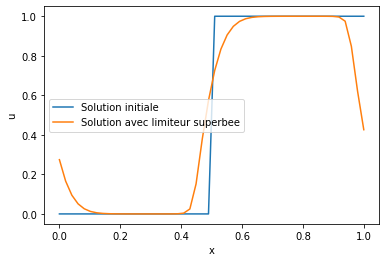

In [59]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Lax_Wendroff(ut,superbee)

# pour t = t_max
ut = Lax_Wendroff(ut,superbee)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur superbee"])
plt.show()

- Avec le limiteur Van-Leer :
$\psi(r) = \frac{r+|r|}{1+r}$

In [60]:
def van_leer(r):
    return (r+np.abs(r))/(1+r + eps*(r==-1))

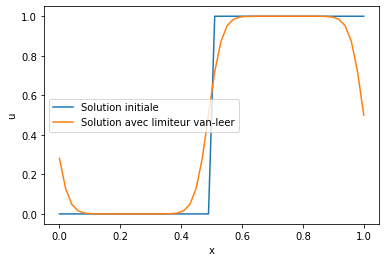

In [61]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)

delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Lax_Wendroff(ut,van_leer)

# pour t = t_max
ut = Lax_Wendroff(ut,van_leer)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur van-leer"])
plt.show()


- Avec le limiteur Van-Albada :
$\psi(r) = \frac{r^2+r}{r^2+1}$

In [62]:
def van_albada(r):
    return (r**2+r)/(r**2+1)

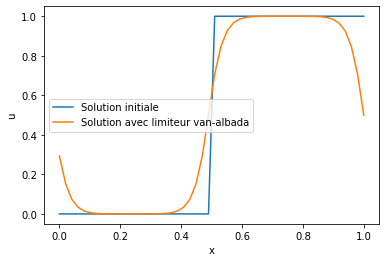

In [63]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)


delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t)

ut = u0
plt.plot(x, ut)

# pour t = t_i
for t in range(tMax):
    ut = Lax_Wendroff(ut,van_albada)

# pour t = t_max
ut = Lax_Wendroff(ut,van_albada)
plt.plot(x, ut)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Solution initiale","Solution avec limiteur van-albada"])
plt.show()


2. Tracer l'évolution temporelle de la variation totale TV, définie comme :
$TV(u^n) = \sum_{i=1}^{m}|u_{i+1}^{n}-u_{i}^{n}|$

In [64]:
def TV(ui):
    return np.sum(np.abs(np.roll(ui, -1) - ui))

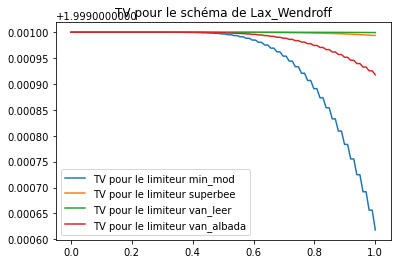

In [65]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5
C=0.5

x = np.linspace(0,L,m)

u0 = cond_init_cl2(x,x_0)


delta_x = L/(m-1)
delta_t = C*delta_x/np.abs(a)
tMax = int(1/delta_t) #1 sec max
T = np.linspace(0, 1/P, tMax+2)

list_limiteurs = [min_mod, superbee, van_leer, van_albada]

for limiteur in list_limiteurs:
    TV_list = []
    # pour t = t_0
    ut = u0
    TV_list.append(TV(ut))

    # pour t = t_i
    for t in range(tMax):
        ut = Lax_Wendroff(ut, limiteur, C)
        TV_list.append(TV(ut))


    # pour t = t_max
    ut = Lax_Wendroff(ut, limiteur, C)
    TV_list.append(TV(ut))
    plt.plot(T, np.array(TV_list))

plt.legend(["TV pour le limiteur {}".format(limiteur.__name__) for limiteur in list_limiteurs])
plt.title("TV pour le schéma de Lax_Wendroff")
plt.show()


3. Commenter l'ensemble des résultats obtenus.

Pour la condition initiale en créneau, on retrouve pour les deux schémas implémentés (Lax_Wendroff et Beam_Warming) les mêmes résultats pour tous les limiteurs. Cependant, ils ne donnent pas les mêmes résultats sans appliquer un limiteur.
On a donc deux schémas se comportent de la même manière s'ils sont limités mais différemment s'ils ne le sont pas.